In [1]:
#载入数据
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow版", tf.__version__)

TensorFlow版 1.14.0


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/Users/lumin/Documents/dataset/MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/lumin/Documents/dataset/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/lumin/Documents/dataset/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /Users/lumin/Documents/dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/lumin/Documents/dataset/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
#mnist 中每张图片共28*28=784个像素点
x = tf.placeholder(tf.float32, [None, 784], name="X")
#0-9 一共10个数字=>10个类别
y = tf.placeholder(tf.float32, [None, 10], name="Y")

In [4]:
#定义变量
W = tf.Variable(tf.random_normal([784,10]),name="W")
b = tf.Variable(tf.zeros([10]), name="b")

In [5]:
forward = tf.matmul(x,W)+b # 前向计算

In [6]:
pred = tf.nn.softmax(forward) #Sotfmax分类

In [7]:
train_epochs = 50 # 训练轮数
batch_size = 50   # 单次训练样本数（批次大小）
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 10     #显示粒度
learning_rate = 0.05  #学习率

In [8]:
#定义交叉熵损失函数
loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

In [9]:
#梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [10]:
#检查预测类别tf.argmax(pred,1)与实际类别tf.argmax(y,1)的匹配情况
correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [11]:
#准确率，将布乐值转化为浮点数，并计算平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [12]:
sess = tf.Session() #声明会话
init = tf.global_variables_initializer() #变量初始化
sess.run(init)

In [13]:
#开始训练
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)     #读取批次数据
        sess.run(optimizer,feed_dict = {x: xs, y: ys})  #执行批次训练
    #total_batch个批次训练完成后,使用验证数据计算误差与准确率;验证集没有分批
    loss,acc = sess.run([loss_function, accuracy], feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
    #打印训练过程中的详细信息
    if(epoch+1) % display_step ==0:
        print("Train Epoch:%02d" % (epoch+1), "Loss={:.9f}".format(loss), "Accuracy={:.4f}".format(acc))
print("Train Finished!")

Train Epoch:10 Loss=0.508154869 Accuracy=0.8852
Train Epoch:20 Loss=0.422907233 Accuracy=0.8960
Train Epoch:30 Loss=0.384259045 Accuracy=0.9030
Train Epoch:40 Loss=0.359610289 Accuracy=0.9084
Train Epoch:50 Loss=0.345491201 Accuracy=0.9116
Train Finished!


In [14]:
# 完成训练后,在测试集上评估模型的准确率
accu_test = sess.run(accuracy,feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("Test Accuracy:", accu_test)

# 完成训练后,在验证集上评估模型的准确率
accu_validation = sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
print("Test Accuracy:", accu_validation)

# 完成训练后,在训练集上评估模型的准确率
accu_train = sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels})
print("Test Accuracy:", accu_train)

Test Accuracy: 0.9072
Test Accuracy: 0.9116
Test Accuracy: 0.9142727


In [15]:
# 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字
prediction_result = sess.run(tf.argmax(pred,1), feed_dict={x: mnist.test.images})

In [16]:
# 查看预测结果中的前10项
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [17]:
def plot_images_labels_prediction(images,     # 图像列表
                                  labels,     # 标签列表
                                  prediction, # 预测值列表
                                  index,      # 从第index个开始显示
                                  num=10):    # 缺省一次显示 10 幅
    fig = plt.gcf() # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12) # 1英寸等于2.54cm
    if num > 25:
        num = 25 # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5,5,i+1) # 获取当前要处理的子图
        ax.imshow(np.reshape(images[index], (28, 28)), cmap="binary") # 显示第index个图像

        title = "label=" + str(np.argmax(labels[index])) # 构建该图上要显示的title信息
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[index])
        
        ax.set_title(title, fontsize=10) # 显示图上的title信息
        ax.set_xticks([]) # 不显示坐标轴
        ax.set_yticks([])
        index += 1
    plt.show()

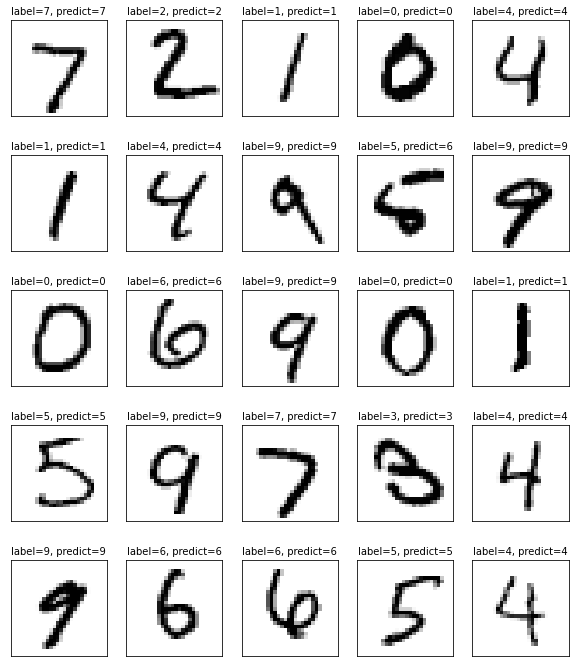

In [18]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels, 
                              prediction_result, 0, 25)